In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('dailykos.csv')

In [ ]:
df

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Each varible has been appeared on atleast 50 different articles
df.shape

(3430, 1545)

In [ ]:
# Compute Euclidean distances
distances = pdist(df, metric='euclidean')
dist = linkage(distances, method='ward')

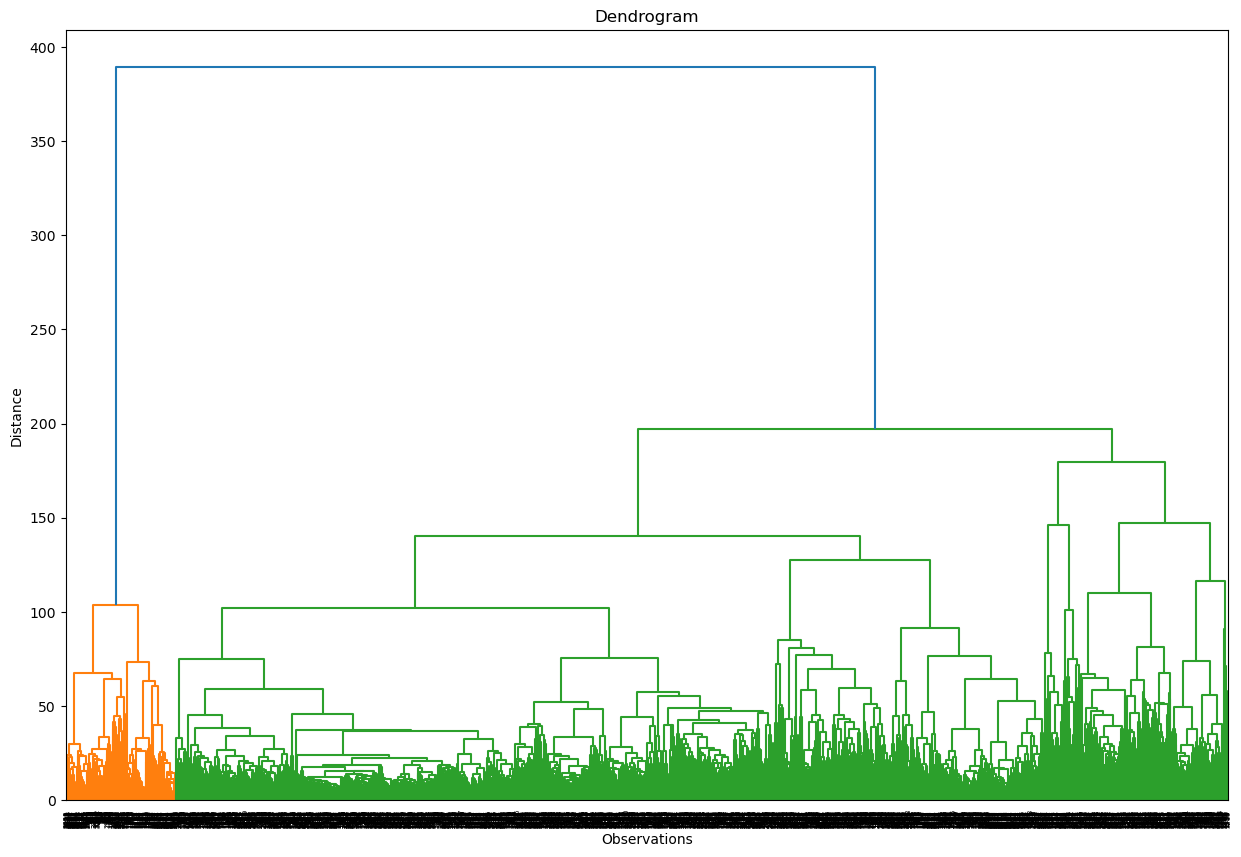

In [ ]:
# Create a dendrogram using calculated distances
plt.figure(figsize=(15, 10))
dendrogram(dist, labels=df.index, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

### **Q) In this problem, we are trying to cluster news articles or blog posts into groups.This can be used to show readers categories to choose from when trying to decide what to read.Just thinking about this application, what are good choices for the number of clusters? Explain your thinking.**

The choices for the number of clusters depends on various factors such as nature of data. Here in this case, new articles or
blog posts can be categorized into different groups based on the topic it is covering such as sports, entertainment, politics etc.,
After there is a domain of values for the groups, different techniques like elbow method, silhoutte score can be used to
decide on the optimal number of clusters


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering with 7 clusters
hc_clusters = fcluster(dist, 7, criterion='maxclust')

In [ ]:
len(hc_clusters)

3430

In [ ]:
print(np.unique(hc_clusters))

[1 2 3 4 5 6 7]


In [ ]:
# Create a new DataFrame with the cluster assignments
df_clusters = pd.DataFrame({'Cluster': hc_clusters})
df_clusters = pd.concat([df_clusters, df], axis=1)
df_clusters

,Cluster,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
counts = df_clusters['Cluster'].value_counts()
counts

2    1761
3     803
1     324
6     270
7     167
4      55
5      50
Name: Cluster, dtype: int64

### **Q) How many observations are in cluster 3?**

In [ ]:
print((df_clusters['Cluster'] == 3).sum())


803


### **Q) Which cluster has the most observations?**

In [ ]:
# cluster with max observations
max_cluster = counts.idxmax()
print(max_cluster)

2


### **Q) Which cluster has the fewest observations?**

In [ ]:
# cluster with minimum observations
min_cluster = counts.idxmin()
print(min_cluster)

5


### **Q4) Instead of looking at the average value in each variable individually, we’ll just look at the top 6 words in each cluster.Compute the mean frequency values of each of the words in cluster 1, and then output the 6 words that occur the most frequently.**

In [ ]:
# Filter the data for Cluster 1
cluster1 = df_clusters[hc_clusters == 1]
#mean_freq = cluster1.mean()
mean_freq = cluster1.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
democrat      2.858025
bush          2.858025
dtype: float64


**'november' word is the most frequent word in cluster number 1 according to the average values**

**Q5) Now repeat the command given in the previous problem for each of the other clusters, and answer the following questions.**

In [ ]:
# Filter the data for Cluster 2
cluster2 = df_clusters[hc_clusters == 2]
#mean_freq = cluster2.mean()
mean_freq = cluster2.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
dtype: float64


In [ ]:
# Filter the data for Cluster 3
cluster3 = df_clusters[hc_clusters == 3]
mean_freq = cluster3.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64


In [ ]:
# Filter the data for Cluster 4
cluster4 = df_clusters[hc_clusters == 4]
mean_freq = cluster4.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

dean         12.309091
kerry         5.345455
democrat      3.545455
edward        2.818182
candidate     2.727273
gephardt      2.672727
dtype: float64


In [ ]:
# Filter the data for Cluster 5
cluster5 = df_clusters[hc_clusters == 5]
mean_freq = cluster5.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

democrat      12.38
parties        6.34
state          5.74
republican     5.64
senate         3.30
seat           3.14
dtype: float64


In [ ]:
# Filter the data for Cluster 6
cluster6 = df_clusters[hc_clusters == 6]
mean_freq = cluster6.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

bush              4.777778
iraq              3.425926
war               2.470370
administration    2.225926
american          1.633333
presided          1.488889
dtype: float64


In [ ]:
# Filter the data for Cluster 7
cluster7 = df_clusters[hc_clusters == 7]
mean_freq = cluster7.iloc[:, 1:].mean()
# Sort the words by their mean frequencies in descending order for top 6 words
sorted_words = mean_freq.sort_values(ascending=False)[:6]
sorted_words.values
print(sorted_words)

kerry       8.101796
bush        7.574850
campaign    1.862275
poll        1.736527
presided    1.616766
democrat    1.389222
dtype: float64


In [ ]:
#Output of all the clusters with frequency
num_clusters = 7
var_names = [f"cluster_{i}" for i in range(1, num_clusters+1)]
top_words_df = pd.DataFrame()
for i in range(1, num_clusters+1):
    cluster = df_clusters[hc_clusters == i]
    mean_freq = cluster.iloc[:, 1:].mean()
    top_words = mean_freq.sort_values(ascending=False)[:6]
    cluster_name = var_names[i-1]
    freq_name = f"{var_names[i-1]}_frequency"
    top_words_df[cluster_name] = top_words.index.tolist()
    top_words_df[freq_name] = top_words.values.tolist()
top_words_df

,cluster_1,cluster_1_frequency,cluster_2,cluster_2_frequency,cluster_3,cluster_3_frequency,cluster_4,cluster_4_frequency,cluster_5,cluster_5_frequency,cluster_6,cluster_6_frequency,cluster_7,cluster_7_frequency
0,november,10.376543,bush,1.546281,poll,2.429639,dean,12.309091,democrat,12.38,bush,4.777778,kerry,8.101796
1,poll,4.851852,democrat,0.659852,kerry,2.012453,kerry,5.345455,parties,6.34,iraq,3.425926,bush,7.574850
2,vote,4.376543,kerry,0.607609,bush,1.922790,democrat,3.545455,state,5.74,war,2.470370,campaign,1.862275
3,challenge,4.104938,state,0.542873,democrat,1.823163,edward,2.818182,republican,5.64,administration,2.225926,poll,1.736527
4,democrat,2.858025,presided,0.526973,republican,1.328767,candidate,2.727273,senate,3.30,american,1.633333,presided,1.616766
5,bush,2.858025,republican,0.519591,elect,1.165629,gephardt,2.672727,seat,3.14,presided,1.488889,democrat,1.389222


**Q) Which cluster could best be described as the cluster related to the Iraq war?**

According to the output of most frequent words in each clusters, cluster 6 is relatively more relevant to Iraq war

**Q) In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party?**

Cluster 4 has most frequent words like 'dean','kerry','candidate','democrat','edward' this indicates that this maybe more related to the democratic party

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=1000, n_init=150).fit(df)
clusters = kmeans.predict(df)
clusters = clusters+1

In [ ]:
np.unique(clusters)

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
# Create a new DataFrame with the cluster assignments
df_clusters2 = pd.DataFrame({'kmeans_Cluster': clusters})
df_clusters2 = pd.concat([df_clusters2, df], axis=1)

In [ ]:
df_clusters2

,kmeans_Cluster,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,7,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# How many observations are in cluster 3?
print((df_clusters2['kmeans_Cluster'] == 3).sum())

255


In [ ]:
# Which cluster has the most observations?
print(df_clusters2['kmeans_Cluster'].value_counts().idxmax())

7


In [ ]:
# Which cluster has the fewest observations?
print(df_clusters2['kmeans_Cluster'].value_counts().idxmin())

5


In [ ]:
df_clusters2['kmeans_Cluster'].value_counts()

7    1894
4     383
1     364
6     330
3     255
2     158
5      46
Name: kmeans_Cluster, dtype: int64

**Now, output the six most frequent words in each cluster, like we did in the previous problem, for each of the k-means clusters.**

In [ ]:
# Displaying 6 most frequent words in each cluster
num_clusters = 7
var_names = [f"cluster_{i}" for i in range(1, num_clusters+1)]
top_words_df = pd.DataFrame(columns=var_names)
for i in range(1, num_clusters+1):
    cluster = df_clusters2[clusters == i]
    mean_freq = cluster.iloc[:, 1:].mean()
    top_words = mean_freq.sort_values(ascending=False)[:6]
    top_words_df[var_names[i-1]] = top_words.index.tolist()
top_words_df

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,democrat,dean,iraq,bush,democrat,november,bush
1,republican,kerry,bush,kerry,parties,poll,kerry
2,elect,clark,war,poll,republican,vote,poll
3,state,edward,administration,presided,state,challenge,democrat
4,senate,democrat,american,campaign,seat,bush,general
5,parties,poll,iraqi,democrat,senate,democrat,elect


**Q) Which k-means cluster best corresponds to the Iraq War?**

Cluster 3

**Q) Which k-means cluster best corresponds to the democratic party?**

Cluster 2

In [ ]:
# Crosstab
import pandas as pd
# Create a DataFrame with the cluster assignments for each method
df = pd.DataFrame({ 'HC Cluster': hc_clusters, 'K-Means Cluster': df_clusters2['kmeans_Cluster']})
# Create the cross-tabulation table
pd.crosstab(df['HC Cluster'], df['K-Means Cluster'])

K-Means Cluster,1,2,3,4,5,6,7
HC Cluster,,,,,,,
1,0,0,0,0,0,324,0
2,91,4,75,96,0,0,1495
3,248,94,3,104,8,1,345
4,0,54,0,0,1,0,0
5,9,0,0,4,36,1,0
6,14,0,174,60,1,0,21
7,2,6,3,119,0,4,33


**Q) Which Hierarchical Cluster best corresponds to K-Means Cluster 2?**

Hierarchial Cluster 3 correspond to K-Means cluster 2 because they share the highest number of data points 94

**Q) Which Hierarchical Cluster best corresponds to K-Means Cluster 3?**

Hierarchial Cluster 6 correspond to K-Means cluster 2 because they share the highest number of data points 174